In [3]:
# Analysis of Oil Prices

# ## 1. Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# API Key and URL
api_key = "GM3KMPVGzy17PqWTgumuCQ6BI1EOTOPj13q5bvZ3"
base_url = "https://api.eia.gov/v2/natural-gas/pri/fut/data/"

In [8]:
# Parameters for the API request
params = {
    "api_key": api_key,
    "frequency": "annual",
    "data[0]": "value",
    "sort[0][column]": "period",
    "sort[0][direction]": "desc",
    "offset": 0,
    "length": 5000,
}

In [14]:
!pip install requests
import requests


In [16]:
response = requests.get(base_url, params=params)

In [18]:
# Check the response status
if response.status_code == 200:
    print("Data fetched successfully!")
    data = response.json()

    # Extract relevant data from the JSON response
    if "response" in data and "data" in data["response"]:
        df = pd.DataFrame(data["response"]["data"])
        
        # Save the data to a CSV file
        csv_path = "../data/raw/natural_gas_prices.csv"
        df.to_csv(csv_path, index=False)
        print(f"Data saved to {csv_path}")
    else:
        print("No data found in the response.")
else:
    print(f"Failed to fetch data. HTTP Status code: {response.status_code}")
    print(response.text)


Data fetched successfully!
Data saved to ../data/raw/natural_gas_prices.csv


In [20]:
# Load the dataset
data = pd.read_csv("../data/raw/natural_gas_prices.csv")

# Display the first few rows
print(data.head())

   period duoarea      area-name product product-name process  \
0    2024   Y35NY  NEW YORK CITY    EPG0  Natural Gas     PE4   
1    2024   Y35NY  NEW YORK CITY    EPG0  Natural Gas     PE1   
2    2024   Y35NY  NEW YORK CITY    EPG0  Natural Gas     PE2   
3    2024   Y35NY  NEW YORK CITY    EPG0  Natural Gas     PE3   
4    2024     RGC            NaN    EPG0  Natural Gas     PS0   

        process-name   series  \
0  Future Contract 4    RNGC4   
1  Future Contract 1    RNGC1   
2  Future Contract 2    RNGC2   
3  Future Contract 3    RNGC3   
4         Spot Price  RNGWHHD   

                                  series-description  value    units  
0  Natural Gas Futures Contract 4 (Dollars per Mi...  2.365  $/MMBTU  
1  Natural Gas Futures Contract 1 (Dollars per Mi...  2.075  $/MMBTU  
2  Natural Gas Futures Contract 2 (Dollars per Mi...  2.050  $/MMBTU  
3  Natural Gas Futures Contract 3 (Dollars per Mi...  2.188  $/MMBTU  
4  Henry Hub Natural Gas Spot Price (Dollars per ...  2

In [22]:
# Check for missing values
print(data.isnull().sum())

# View data types
print(data.dtypes)

# View summary statistics
print(data.describe())

period                 0
duoarea                0
area-name             28
product                0
product-name           0
process                0
process-name           0
series                 0
series-description     0
value                  0
units                  0
dtype: int64
period                  int64
duoarea                object
area-name              object
product                object
product-name           object
process                object
process-name           object
series                 object
series-description     object
value                 float64
units                  object
dtype: object
            period       value
count   166.000000  166.000000
mean   2009.530120    4.621717
std       8.752264    2.686250
min    1993.000000    1.692000
25%    2002.000000    2.575000
50%    2010.000000    3.872000
75%    2017.000000    6.106000
max    2024.000000   15.200000


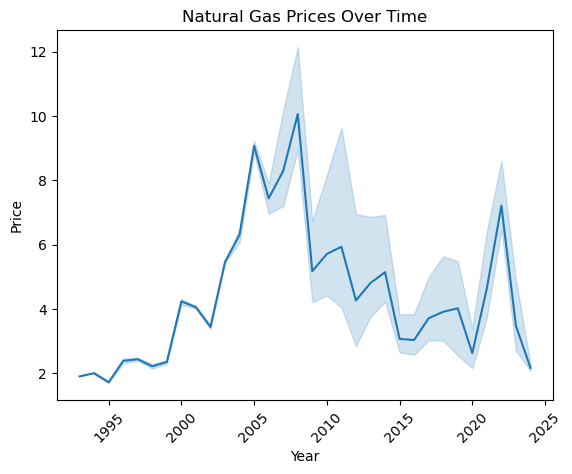

In [24]:
# Plot the trend of natural gas prices over time
sns.lineplot(x="period", y="value", data=data)
plt.title("Natural Gas Prices Over Time")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

In [26]:
# Convert 'period' to datetime if it's not already
data['period'] = pd.to_datetime(data['period'], format='%Y')


In [28]:

# Define features (X) and target (y)
X = data[['period']]  # Example: Replace with relevant features
y = data['value']  # Replace with the actual target column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Ensure 'period' is in datetime format
data['period'] = pd.to_datetime(data['period'], format='%Y')

# Extract the year from 'period' as a numerical feature
data['year'] = data['period'].dt.year


In [36]:
# Define features (X) and target (y)
X = data[['year']]  # Use 'year' as the feature
y = data['value']   # Target column


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


Mean Squared Error: 9.145095344700087
R-squared Score: -0.05302699132573263


In [40]:
# Calculate days since the first date
data['days_since_start'] = (data['period'] - data['period'].min()).dt.days

# Use 'days_since_start' as the feature
X = data[['days_since_start']]


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared (R²):", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 1.9768944735021037
Mean Squared Error (MSE): 9.145095344700087
R-squared (R²): -0.05302699132573263


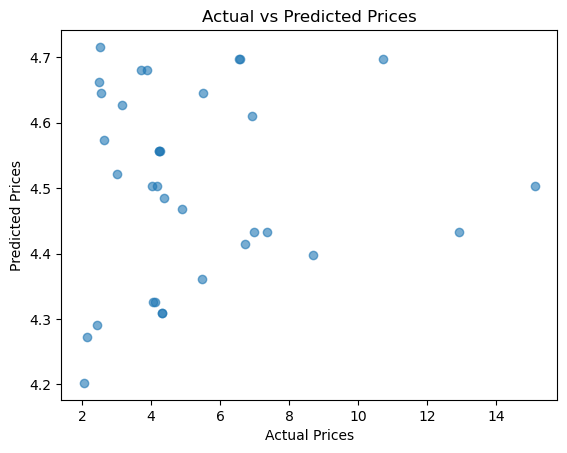

In [44]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


In [46]:
import joblib

joblib.dump(model, "../models/natural_gas_price_model.joblib")
print("Model saved to ../models/natural_gas_price_model.joblib")


Model saved to ../models/natural_gas_price_model.joblib


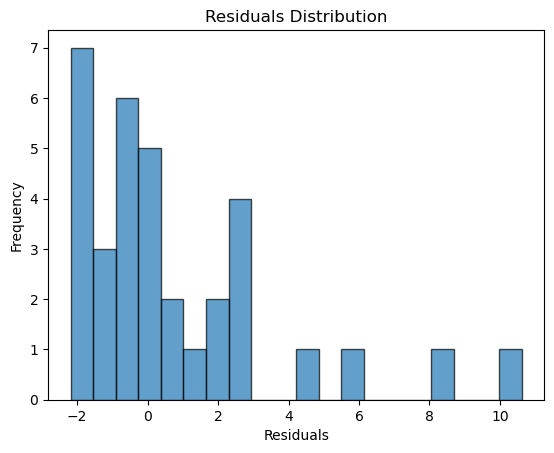

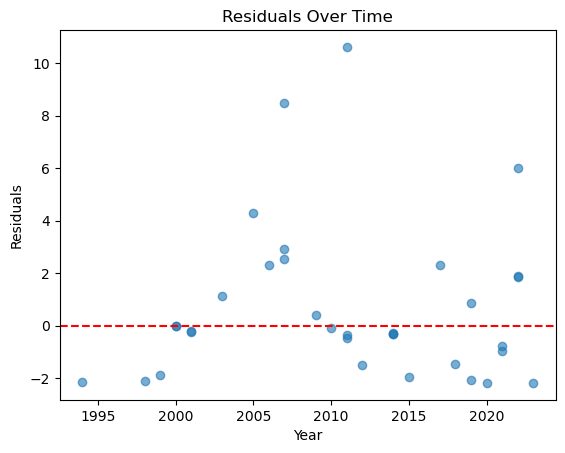

In [48]:
residuals = y_test - y_pred

plt.hist(residuals, bins=20, edgecolor="k", alpha=0.7)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Plot residuals over time
plt.scatter(X_test, residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals Over Time")
plt.xlabel("Year")
plt.ylabel("Residuals")
plt.show()


In [50]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("Random Forest R²:", r2_score(y_test, rf_predictions))


Random Forest R²: 0.2830701218744316


In [52]:
# Create lagged features
data['lag_1'] = data['value'].shift(1)  # Price from the previous period
data['lag_2'] = data['value'].shift(2)  # Price from two periods ago

# Drop rows with NaN values after creating lagged features
data.dropna(inplace=True)

# Split the data
train = data[data['year'] < 2020]  # Train on data before 2020
test = data[data['year'] >= 2020]  # Test on data from 2020 onwards

# Features and target
X_train = train[['year', 'lag_1', 'lag_2']]
y_train = train['value']
X_test = test[['year', 'lag_1', 'lag_2']]
y_test = test['value']


In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


Mean Squared Error: 6.371689105286371
R-squared Score: -0.12217002724762782


In [58]:
# Create a DataFrame for future predictions
future_years = pd.DataFrame({'year': range(2023, 2030)})

# Initialize lagged values based on the last known data
last_known_value = data['value'].iloc[-1]
second_last_known_value = data['lag_1'].iloc[-1]

# Create empty columns for lagged values and predictions
future_years['lag_1'] = 0.0
future_years['lag_2'] = 0.0
future_years['predicted_price'] = 0.0

# Fill lagged values and predict iteratively
for i in range(len(future_years)):
    if i == 0:
        # Use last known values for the first row
        future_years.loc[i, 'lag_1'] = last_known_value
        future_years.loc[i, 'lag_2'] = second_last_known_value
    else:
        # Use previous predictions as lagged values
        future_years.loc[i, 'lag_1'] = future_years.loc[i - 1, 'predicted_price']
        future_years.loc[i, 'lag_2'] = future_years.loc[i - 1, 'lag_1']
    
    # Predict using the model
    future_years.loc[i, 'predicted_price'] = model.predict(
        [[future_years.loc[i, 'year'], future_years.loc[i, 'lag_1'], future_years.loc[i, 'lag_2']]]
    )

# Display future predictions
print(future_years)


   year    lag_1    lag_2  predicted_price
0  2023  1.90600  2.00100          4.52532
1  2024  4.52532  1.90600          3.90102
2  2025  3.90102  4.52532          5.54762
3  2026  5.54762  3.90102          7.75537
4  2027  7.75537  5.54762          5.28745
5  2028  5.28745  7.75537          4.94907
6  2029  4.94907  5.28745          5.11593


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:

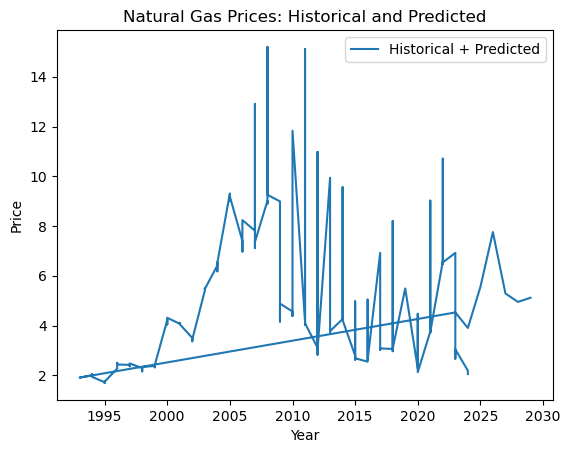

In [60]:
combined = pd.concat([data[['year', 'value']].rename(columns={'value': 'price'}), 
                      future_years[['year', 'predicted_price']].rename(columns={'predicted_price': 'price'})])

plt.plot(combined['year'], combined['price'], label='Historical + Predicted')
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Natural Gas Prices: Historical and Predicted")
plt.legend()
plt.show()


  Using cached Cython-3.0.11-py2.py3-none-any.whl.metadata (3.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.1 MB/s eta 0:00:00ta 0:00:01
Using cached Cython-3.0.11-py2.py3-none-any.whl (1.2 MB)


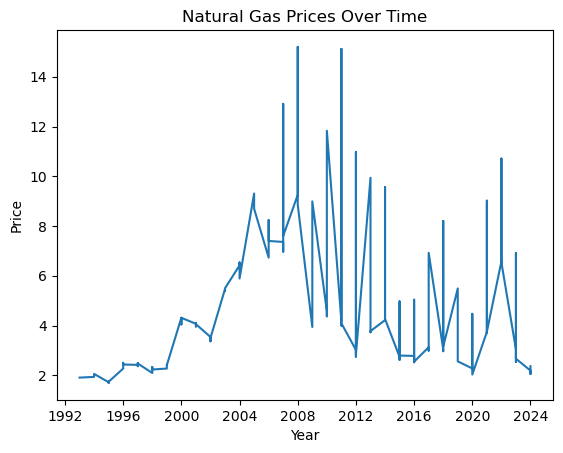

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=643.572, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=715.076, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=679.654, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=643.078, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=713.080, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=644.939, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=644.905, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=645.373, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=641.258, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=643.115, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=643.079, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=677.663, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=643.563, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.249 seconds
                               SARI

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


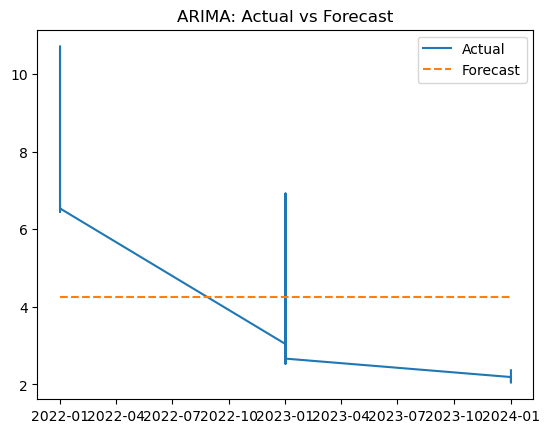

Mean Squared Error: 6.2993165378130795


In [63]:
# Install necessary library
!pip install pmdarima

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Load the dataset
data = pd.read_csv("../data/raw/natural_gas_prices.csv")

# Ensure the 'period' column is a datetime type and sort by time
data['period'] = pd.to_datetime(data['period'], format='%Y')
data.sort_values(by='period', inplace=True)

# Set the 'period' column as the index
data.set_index('period', inplace=True)

# Plot the time series
plt.plot(data.index, data['value'])
plt.title("Natural Gas Prices Over Time")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

# Perform a train-test split (last 10% of data for testing)
train_size = int(len(data) * 0.9)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Auto ARIMA to find the best parameters
auto_model = auto_arima(
    train['value'], 
    seasonal=False, 
    trace=True, 
    suppress_warnings=True, 
    stepwise=True
)
print(auto_model.summary())

# Train the ARIMA model with the selected parameters
arima_model = ARIMA(train['value'], order=auto_model.order)
arima_model_fit = arima_model.fit()

# Forecast for the test period
forecast = arima_model_fit.forecast(steps=len(test))

# Plot actual vs forecast
plt.plot(test.index, test['value'], label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title("ARIMA: Actual vs Forecast")
plt.show()

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['value'], forecast)
print(f"Mean Squared Error: {mse}")


        period  predicted_price
149 2025-12-31         4.240667
150 2026-12-31         4.240667
151 2027-12-31         4.240667
152 2028-12-31         4.240667
153 2029-12-31         4.240667


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/14/rzq40p2n5wd110plmjpl395h0000gn/T/ipykernel_79947/1578446306.py:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=future_steps, freq='Y')


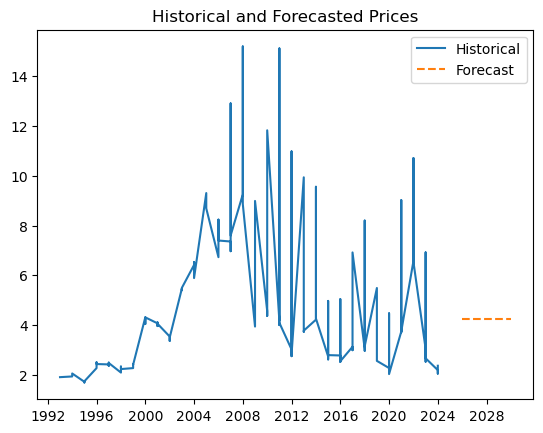

In [65]:
# Predict future values (e.g., next 5 years)
future_steps = 5
future_forecast = arima_model_fit.forecast(steps=future_steps)

# Create a DataFrame with future dates
future_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=future_steps, freq='Y')
future_df = pd.DataFrame({'period': future_dates, 'predicted_price': future_forecast})
print(future_df)

# Plot historical data with future predictions
plt.plot(data.index, data['value'], label='Historical')
plt.plot(future_df['period'], future_df['predicted_price'], label='Forecast', linestyle='--')
plt.legend()
plt.title("Historical and Forecasted Prices")
plt.show()


In [69]:
!pip install prophet
from prophet import Prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 15.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.0 MB/s eta 0:00:00a 0:00:01


20:28:02 - cmdstanpy - INFO - Chain [1] start processing
20:28:03 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


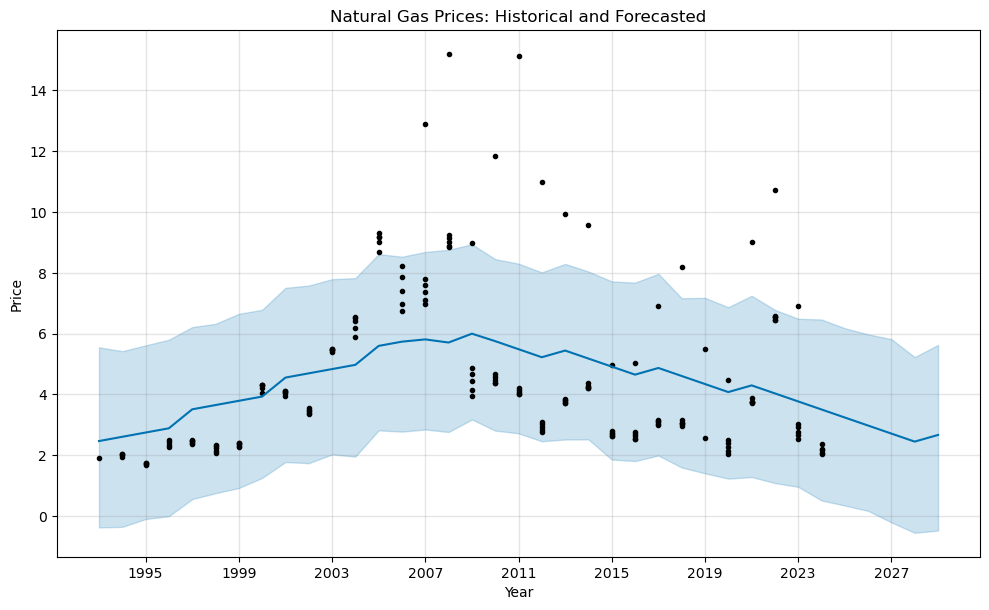

           ds      yhat  yhat_lower  yhat_upper
32 2024-12-31  3.241057    0.346069    6.179181
33 2025-12-31  2.976760    0.171636    5.976365
34 2026-12-31  2.712724   -0.208630    5.819257
35 2027-12-31  2.449096   -0.549976    5.229491
36 2028-12-31  2.668118   -0.476035    5.628301


In [76]:
# Install Prophet
!pip install prophet

# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the dataset
data = pd.read_csv("../data/raw/natural_gas_prices.csv")

# Ensure the 'period' column is a datetime type and sort by time
data['period'] = pd.to_datetime(data['period'], format='%Y')
data.sort_values(by='period', inplace=True)

# Prepare data for Prophet
data_prophet = data[['period', 'value']].rename(columns={'period': 'ds', 'value': 'y'})

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(data_prophet)

# Create future dates for predictions (e.g., 5 years into the future)
future = prophet_model.make_future_dataframe(periods=5, freq='Y')

# Predict future prices
forecast = prophet_model.predict(future)

# Plot the historical data and forecast
fig = prophet_model.plot(forecast)
plt.title("Natural Gas Prices: Historical and Forecasted")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

# View the forecasted values for the future
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
